In [ ]:
#required importations

import langgraph
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [ ]:
# creating state object

class dataobject(TypedDict):
    usd_amt : float
    total_usd : float
    total_inr : float

In [ ]:
#tools

def total_usd_amount(state : dataobject) -> dataobject:

    state['total_usd'] = state['usd_amt'] * 1.5


    return state

def usd_to_inr(state : dataobject) -> dataobject:

    state['total_inr'] = state['total_usd'] * 90
    
    return state

In [ ]:
#adding tools to node with orchestration

builder = StateGraph(dataobject)

builder.add_node("calc_total_usd",total_usd_amount)
builder.add_node("usd_to_inr", usd_to_inr)

builder.add_edge(START, "calc_total_usd")
builder.add_edge("calc_total_usd", "usd_to_inr")
builder.add_edge("usd_to_inr", END)

graph = builder.compile()

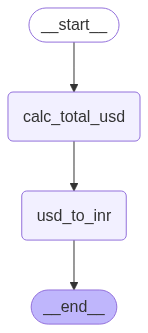

In [ ]:
#display graph

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
graph.invoke({'usd_amt':1000})

{'usd_amt': 1000, 'total_usd': 1500.0, 'total_inr': 135000.0}